In [1]:
# plot graph
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import csv

/tmp/ipykernel_108/2604225492.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


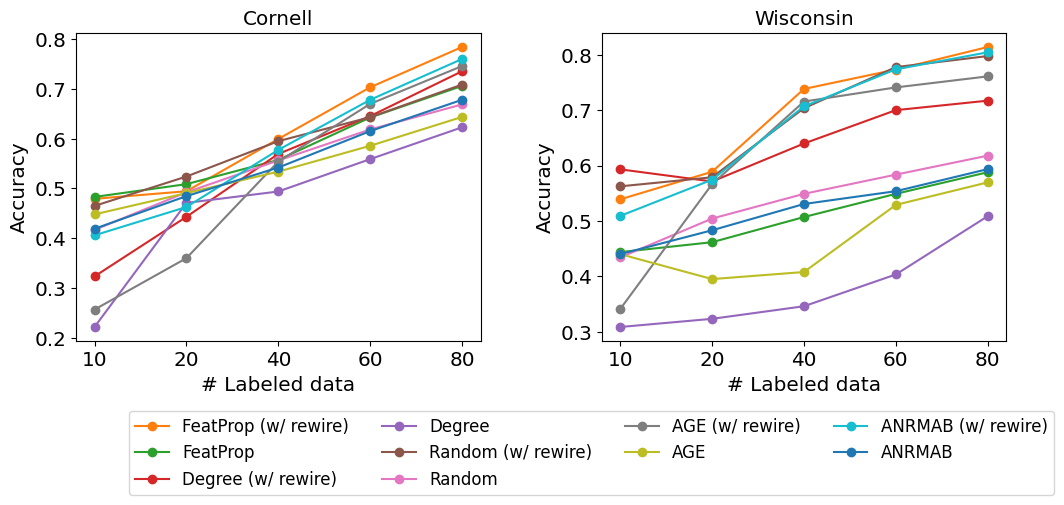

In [13]:
# main plots
import matplotlib.pylab as pylab
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.fontsize': 'large'}
pylab.rcParams.update(params)
filename = '{}.csv'.format('main')
# dataset = 'Cora'
# dataset = 'Citeseer'
# dataset = 'PubMed'
# dataset = 'CoraFull'
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
# fig.

for num, dataset in enumerate(['Cornell', 'Wisconsin']):
# for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed', 'Photo']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset:
                    continue
                stack_array.append(row)
#                 if row[1] == 'CoraFull': # debug
#                     print(row)
    #             res_array.append(list(map(float, row)))
    # extract res and std
    def name_map(method, kmeans_num_layer, uncertain_score, cluster_method, rewire, model, row):
        # filter model
        model = model.strip()
        if model != 'GCN':
            return None, None, None
        if method == 'kmeans':
            # here are the filtered methods
#             if cluster_method == 'kcenter':
#                 return None, None, None
            # TODO: filtering seems to be too strict on CoraFull
#             print(method, kmeans_num_layer, uncertain_score, cluster_method)
#             print(row)
            if cluster_method == 'kmeans':
                if int(kmeans_num_layer) == 2:
                    if rewire == 'TRUE':
                        return 'FeatProp (w/ rewire)', 'C1', 1
                    else:
                        return 'FeatProp', 'C2', 2
        if method == 'degree':
            if rewire == 'TRUE':
                return 'Degree (w/ rewire)', 'C3', 3
            else:
                return 'Degree', 'C4', 4
        if method == 'random':
            if rewire == 'TRUE':
                return 'Random (w/ rewire)', 'C5', 5
            else:
                return 'Random', 'C6', 6
        if method == 'age':
            if rewire == 'TRUE':
                return 'AGE (w/ rewire)', 'C7', 7
            else:
                return 'AGE', 'C8', 8
        if method == 'anrmab':
            if rewire == 'TRUE':
                return 'ANRMAB (w/ rewire)', 'C9', 9
            else:
                return 'ANRMAB', 'C10', 10


    methods = []
    colors = []
    orders = []
    res_array = []
    std_array = []
    
    def parse_string_to_list(string):
        # format: '[0.3205317577548006, 0.1518927827477455]'
        return list(map(float, string[1:][:-1].split(',')))

#     if dataset == 'CoraFull':
#         print(len(stack_array))

    for row in stack_array:
        # extend        
        name, color, order = name_map(row[3], row[5], row[6], row[4], row[10], row[0], row) # number is NOT correct
        if name is None:
            continue
        methods.append(name)
        colors.append(color)
        orders.append(order)
        
        # fields, 9 - 14; 15 - 20
        res_array.append(list(map(parse_string_to_list, row[11:16])))
        # std_array.append(list(map(parse_string_to_list, row[16:22])))


    ordered_indices = np.argsort(orders)
    res_array = np.asarray(res_array)
    # std_array = np.asarray(std_array)
#     fig = plt.figure()
    # for i in range(len(methods)):
    #print(res_array.shape)
    #print(res_array[0,:,0].shape)
    ax = axes[num % 2]
    for i in ordered_indices:
#     for i in ordered_indices[:2]: # debug
        ax.plot(header[11:16], res_array[i, :, 0], marker='o', label=methods[i], color=colors[i])
#         ax.fill_between(header[10:14], res_array[i, :]-std_array[i,:], res_array[i, :]+std_array[i,:], alpha=0.2, color=colors[i])
#     plt.legend()
    ax.set_title(dataset)
    ax.set_xlabel('# Labeled data')
    ax.set_ylabel('Accuracy')
#     fig.tight_layout()    
#     plt.savefig('figs/{}.pdf'.format(dataset))

# plt.legend()
lgd = axes[0].legend(bbox_to_anchor=(0.13, -0.5), loc='lower left', borderaxespad=0., ncol=4)
fig.tight_layout()
plt.savefig('figs/All.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig('figs/All_std.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')





In [ ]:
for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed']):
# for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed', 'Photo']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset:
                    continue
                stack_array.append(row)
    print(stack_array[0][16:22])

In [ ]:
# main kcenter_kmeans comparison
import matplotlib.pylab as pylab
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.fontsize': 'large'}
pylab.rcParams.update(params)
filename = '{}.csv'.format('kcenter_kmeans')

fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
# fig.

for num, dataset in enumerate(['Cora', 'Citeseer']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset:
                    continue
                stack_array.append(row)
    #             res_array.append(list(map(float, row)))
    # extract res and std
    def name_map(method, cluster_method, kmeans_num_layer, uncertain_score):
        if method == 'kmeans':
            if cluster_method == 'kcenter':
                return 'FeatProp-kcenter', 'C0', 10
            if int(kmeans_num_layer) == 2:
                return 'FeatProp', 'C3', 0
            elif int(kmeans_num_layer) == 0:
                return 'FeatureClustering', 'C4', 4
        if method == 'uncertain':
            if uncertain_score == 'margin':
                return 'Uncertainty-margin', 'C5', 5
            elif uncertain_score == 'entropy':
                return 'Uncertainty-entropy', 'C6', 6
        if method == 'degree':
            return 'Degree', 'C2', 2
        if method == 'random':
            return 'Random', 'C1', 1
        if method == 'coreset':
            return 'Coreset-greedy', 'C7', 7
        if method == 'xcoresetmip':
            return 'CoresetMIP', 'C8', 8



    methods = []
    colors = []
    orders = []
    res_array = []
    std_array = []
    for row in stack_array:
        # fields, 9 - 13; 14 - 18
        res_array.append(list(map(float, row[10:14])))
        std_array.append(list(map(float, row[14:18])))
        # extend
        name, color, order = name_map(row[2], row[3], row[4], row[5])
        methods.append(name)
        colors.append(color)
        orders.append(order)


    ordered_indices = np.argsort(orders)
    res_array = np.asarray(res_array)
    std_array = np.asarray(std_array)
#     fig = plt.figure()
    # for i in range(len(methods)):
    ax = axes[ num % 2]
    for i in ordered_indices:
        ax.plot(header[10:14], res_array[i, :], marker='o', label=methods[i], color=colors[i])
#         plt.fill_between(header[10:14], res_array[i, :]-std_array[i,:], res_array[i, :]+std_array[i,:], alpha=0.2)
#     plt.legend()
    ax.set_title(dataset)
    ax.set_xlabel('# Labeled data')
    ax.set_ylabel('Accuracy')
#     fig.tight_layout()    
#     plt.savefig('figs/{}.pdf'.format(dataset))

# plt.legend()
lgd = axes[0].legend(bbox_to_anchor=(0.83, -0.4), loc='lower left', borderaxespad=0., ncol=4)
fig.tight_layout()
plt.savefig('figs/kcenter_kmeans.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')





In [ ]:
# main kcenter_kmeans comparison
import matplotlib.pylab as pylab
import json
from collections import Counter
from torch_geometric.datasets import Planetoid, CoraFull
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.fontsize': 'large'}
pylab.rcParams.update(params)
def parse_y_label(y_labels, num_classes):
    # 5, 10, 20, 40, 80 different pool sizes
    y_label_len = len(y_labels[0])
    # 5 different runs
    y_label_seed_list = [[] for j in range(y_label_len)]
    for i in range(5):
        for j in range(y_label_len):
            y_label_seed_list[j].extend(y_labels[i][j])
    return [give_dist(y_label_seed_list[j], num_classes) for j in range(y_label_len)]
# parse the labels
def give_dist(labels, num_classes):
    counter = Counter(labels)
    ret_array = [counter[i]/float(len(labels)) for i in range(num_classes)]
    return ret_array

def KL(P,Q):
    epsilon = 0.00001
    # You may want to instead make copies to avoid changing the np arrays.
    P = np.asarray(P)+epsilon
    Q = np.asarray(Q)+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

# filename = '{}.csv'.format('main')
filename = '{}.csv'.format('kcenter_kmeans')

fig, axes = plt.subplots(2, 2, figsize=(12, 6), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
# fig.

# for num, dataset in enumerate(['Cora', 'Citeseer']):
for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed', 'CoraFull']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset:
                    continue
                stack_array.append(row)
    #             res_array.append(list(map(float, row)))
    # extract res and std
    def name_map(method, cluster_method, kmeans_num_layer, uncertain_score):
        if method == 'kmeans':
            if cluster_method == 'kcenter':
                return 'FeatProp-kcenter', 'C0', 10
            if int(kmeans_num_layer) == 2:
                return 'FeatProp', 'C3', 0
            elif int(kmeans_num_layer) == 0:
                return 'FeatureClustering', 'C4', 4
        if method == 'uncertain':
            if uncertain_score == 'margin':
                return 'Uncertainty-margin', 'C5', 5
            elif uncertain_score == 'entropy':
                return 'Uncertainty-entropy', 'C6', 6
        if method == 'degree':
            return 'Degree', 'C2', 2
        if method == 'random':
            return 'Random', 'C1', 1
        if method == 'coreset':
            return 'Coreset-greedy', 'C7', 7
        if method == 'xcoresetmip':
            return 'CoresetMIP', 'C8', 8

    # ground-truth statistics
    if dataset == 'CoraFull':
        pydataset = CoraFull(root='./data/CoraFull')
    else:
        pydataset = Planetoid(root='./data/{}'.format(dataset), name=dataset)
    data = pydataset[0]
    num_classes = pydataset.num_classes
    true_dist = give_dist(data.y.numpy(), num_classes)
    print(true_dist)

    methods = []
    colors = []
    orders = []
    y_labels = []
    res_array = []
    std_array = []
    kl_array = []
    for row in stack_array:
        # fields, 9 - 13; 14 - 18
        res_array.append(list(map(float, row[10:14])))
        std_array.append(list(map(float, row[15:19])))
        # read the label list
        ori_filename = row[19]
        parsed = json.load(open(ori_filename, 'r'))
        y_labels.append(parsed['y_label'])
#         print(y_labels[-1])
     
            
        # extend
        name, color, order = name_map(row[2], row[3], row[4], row[5])
        methods.append(name)
        colors.append(color)
        orders.append(order)
        cur_dists = parse_y_label(y_labels[-1], num_classes)
        kls = [KL(true_dist, cur_dist) for cur_dist in cur_dists]
        kl_array.append(kls[1:])
        print(name, kls)
    kl_array = np.asarray(kl_array)
    res_array = np.asarray(res_array)
#     print(kl_array.shape, res_array.shape)
    ax = axes[num // 2][ num % 2]
    ordered_indices = np.argsort(orders)    
    for i in ordered_indices:
        ax.plot(header[10:14], kl_array[i, :], marker='o', label=methods[i], color=colors[i])
    ax.set_title(dataset)
    ax.set_xlabel('# Labeled data')
    ax.set_ylabel('KL Divergence')
    if dataset != 'CoraFull':
        ax.set_ylim(0, 0.1)




# plt.legend()
lgd = axes[1][0].legend(bbox_to_anchor=(0.83, -0.4), loc='lower left', borderaxespad=0., ncol=4)
fig.tight_layout()
# plt.savefig('figs/kcenter_kmeans.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')





In [ ]:
# main kcenter_kmeans comparison
import matplotlib.pylab as pylab
import json
from collections import Counter
from torch_geometric.datasets import Planetoid, CoraFull
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.fontsize': 'large'}
pylab.rcParams.update(params)
def parse_y_label(y_labels, num_classes):
    # 5, 10, 20, 40, 80 different pool sizes
    y_label_len = len(y_labels[0])
    # 5 different runs
    y_label_seed_list = [[] for j in range(y_label_len)]
    for i in range(5):
        for j in range(y_label_len):
            y_label_seed_list[j].extend(y_labels[i][j])
    return [give_dist(y_label_seed_list[j], num_classes) for j in range(y_label_len)]
# parse the labels
def give_dist(labels, num_classes):
    counter = Counter(labels)
    ret_array = [counter[i]/float(len(labels)) for i in range(num_classes)]
    return ret_array

def KL(P,Q):
    epsilon = 0.00001
    # You may want to instead make copies to avoid changing the np arrays.
    P = np.asarray(P)+epsilon
    Q = np.asarray(Q)+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

# filename = '{}.csv'.format('main')
filename = '{}.csv'.format('kcenter_kmeans')

fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
# fig.

for num, dataset in enumerate(['Cora', 'Citeseer']):
# for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed', 'CoraFull']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset:
                    continue
                stack_array.append(row)
    #             res_array.append(list(map(float, row)))
    # extract res and std
    def name_map(method, cluster_method, kmeans_num_layer, uncertain_score):
        if method == 'kmeans':
            if cluster_method == 'kcenter':
                return 'FeatProp-kcenter', 'C0', 10
            if int(kmeans_num_layer) == 2:
                return 'FeatProp', 'C3', 0
            elif int(kmeans_num_layer) == 0:
                return 'FeatureClustering', 'C4', 4
        if method == 'uncertain':
            if uncertain_score == 'margin':
                return 'Uncertainty-margin', 'C5', 5
            elif uncertain_score == 'entropy':
                return 'Uncertainty-entropy', 'C6', 6
        if method == 'degree':
            return 'Degree', 'C2', 2
        if method == 'random':
            return 'Random', 'C1', 1
        if method == 'coreset':
            return 'Coreset-greedy', 'C7', 7
        if method == 'xcoresetmip':
            return 'CoresetMIP', 'C8', 8

    # ground-truth statistics
    if dataset == 'CoraFull':
        pydataset = CoraFull(root='./data/CoraFull')
    else:
        pydataset = Planetoid(root='./data/{}'.format(dataset), name=dataset)
    data = pydataset[0]
    num_classes = pydataset.num_classes
    true_dist = give_dist(data.y.numpy(), num_classes)
    print(true_dist)

    methods = []
    colors = []
    orders = []
    y_labels = []
    res_array = []
    std_array = []
    kl_array = []
    for row in stack_array:
        # fields, 9 - 13; 14 - 18
        res_array.append(list(map(float, row[10:14])))
        std_array.append(list(map(float, row[15:19])))
        # read the label list
        ori_filename = row[19]
        parsed = json.load(open(ori_filename, 'r'))
        y_labels.append(parsed['y_label'])
#         print(y_labels[-1])
     
            
        # extend
        name, color, order = name_map(row[2], row[3], row[4], row[5])
        methods.append(name)
        colors.append(color)
        orders.append(order)
        cur_dists = parse_y_label(y_labels[-1], num_classes)
        kls = [KL(true_dist, cur_dist) for cur_dist in cur_dists]
        kl_array.append(kls[1:])
        print(name, kls)
    kl_array = np.asarray(kl_array)
    res_array = np.asarray(res_array)
#     print(kl_array.shape, res_array.shape)
    ax = axes[ num % 2]
    ordered_indices = np.argsort(orders)    
    for i in ordered_indices:
        ax.plot(header[10:14], kl_array[i, :], marker='o', label=methods[i], color=colors[i])
    ax.set_title(dataset)
    ax.set_xlabel('# Labeled data')
    ax.set_ylabel('KL Divergence')
#     if dataset != 'CoraFull':
#         ax.set_ylim(0, 0.1)




# plt.legend()
lgd = axes[0].legend(bbox_to_anchor=(0.83, -0.4), loc='lower left', borderaxespad=0., ncol=4)
fig.tight_layout()
plt.savefig('figs/kcenter_kmeans_kl.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')





In [ ]:
# SGC vs GCN
import matplotlib.pylab as pylab
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.fontsize': 'large'}
pylab.rcParams.update(params)
filename = '{}.csv'.format('SGC_GCN')
# dataset = 'Cora'
# dataset = 'Citeseer'
# dataset = 'PubMed'
# dataset = 'CoraFull'
fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
# fig.

# for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed', 'CoraFull']):
for num, dataset in enumerate(['Cora', 'Citeseer']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset:
                    continue
                stack_array.append(row)
    #             res_array.append(list(map(float, row)))
    # extract res and std
    def name_map(model, method, cluster_method, kmeans_num_layer, uncertain_score):
#         print('get here')
        if model == 'MatrixGCN':
            return 'GCN', 'C3', 0
        else:
            return 'SGC', 'C0', 10
#         if method == 'kmeans':
#             if cluster_method == 'kcenter':
#                 return 'FeatProp-kcenter', 'C0', 10
#             if int(kmeans_num_layer) == 2:
#                 return 'FeatProp', 'C3', 0
#             elif int(kmeans_num_layer) == 0:
#                 return 'FeatureClustering', 'C4', 4
#         if method == 'uncertain':
#             if uncertain_score == 'margin':
#                 return 'Uncertainty-margin', 'C5', 5
#             elif uncertain_score == 'entropy':
#                 return 'Uncertainty-entropy', 'C6', 6
#         if method == 'degree':
#             return 'Degree', 'C2', 2
#         if method == 'random':
#             return 'Random', 'C1', 1
#         if method == 'coreset':
#             return 'Coreset-greedy', 'C7', 7
#         if method == 'xcoresetmip':
#             return 'CoresetMIP', 'C8', 8


    methods = []
    colors = []
    orders = []
    res_array = []
    std_array = []
#     print(stack_array)
    for row in stack_array:
        # fields, 9 - 13; 14 - 18
        res_array.append(list(map(float, row[10:14])))
        std_array.append(list(map(float, row[15:19])))
        # extend
#         print(row, len(row))
#         print(row[2], row[4], row[5])
        res = name_map(row[0], row[2], row[3], row[4], row[5])
        if res is not None:
            name, color, order = res
            methods.append(name)
            colors.append(color)
            orders.append(order)


    ordered_indices = np.argsort(orders)
    res_array = np.asarray(res_array)
    std_array = np.asarray(std_array)
#     fig = plt.figure()
    # for i in range(len(methods)):
#     ax = axes[num // 2][ num % 2]
    ax = axes[ num % 2]
    for i in ordered_indices:
        ax.plot(header[10:14], res_array[i, :], marker='o', label=methods[i], color=colors[i])
#         ax.fill_between(header[10:14], res_array[i, :]-std_array[i,:], res_array[i, :]+std_array[i,:], alpha=0.2, color=colors[i])
#     plt.legend()
    ax.set_title(dataset)
    ax.set_xlabel('# Labeled data')
    ax.set_ylabel('Accuracy')
#     fig.tight_layout()    
#     plt.savefig('figs/{}.pdf'.format(dataset))

# plt.legend()
# lgd = axes[0].legend(bbox_to_anchor=(0.13, -0.4), loc='lower left', borderaxespad=0., ncol=4)
lgd = axes[0].legend(bbox_to_anchor=(0.83, -0.4), loc='lower left', borderaxespad=0., ncol=4)
fig.tight_layout()
plt.savefig('figs/SGC_GCN.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig('figs/All_std.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')





In [ ]:
# SGC main plots
import matplotlib.pylab as pylab
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.fontsize': 'large'}
pylab.rcParams.update(params)
filename = '{}.csv'.format('main_SGC')
# dataset = 'Cora'
# dataset = 'Citeseer'
# dataset = 'PubMed'
# dataset = 'CoraFull'
fig, axes = plt.subplots(2, 2, figsize=(12, 9), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
# fig.

for num, dataset in enumerate(['Cora', 'Citeseer', 'PubMed', 'CoraFull']):
    stack_array = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
                line_count += 1
            else:
                # filtering
                if row[1] != dataset or row[0] != 'SGC':
                    continue
                stack_array.append(row)
    #             res_array.append(list(map(float, row)))
    # extract res and std
    def name_map(method, cluster_method, kmeans_num_layer, uncertain_score):
#         print('get here')
        if method == 'kmeans':
            if cluster_method == 'kcenter':
                return None
            if int(kmeans_num_layer) == 2:
                return 'FeatProp', 'C3', 0
            elif int(kmeans_num_layer) == 0:
                return 'FeatureClustering', 'C4', 4
        if method == 'uncertain':
            if uncertain_score == 'margin':
                return 'Uncertainty-margin', 'C5', 5
            elif uncertain_score == 'entropy':
                return 'Uncertainty-entropy', 'C6', 6
        if method == 'degree':
            return 'Degree', 'C2', 2
        if method == 'random':
            return 'Random', 'C1', 1
        if method == 'coreset':
            return 'Coreset-greedy', 'C7', 7
        if method == 'xcoresetmip':
            return 'CoresetMIP', 'C8', 8


    methods = []
    colors = []
    orders = []
    res_array = []
    std_array = []
#     print(stack_array)
    for row in stack_array:
        # fields, 9 - 13; 14 - 18
        res_array.append(list(map(float, row[10:14])))
        std_array.append(list(map(float, row[15:19])))
        # extend
#         print(row, len(row))
#         print(row[2], row[4], row[5])
        res = name_map(row[2], row[3], row[4], row[5])
        if res is not None:
            name, color, order = res
            methods.append(name)
            colors.append(color)
            orders.append(order)


    ordered_indices = np.argsort(orders)
    res_array = np.asarray(res_array)
    std_array = np.asarray(std_array)
#     fig = plt.figure()
    # for i in range(len(methods)):
    ax = axes[num // 2][ num % 2]
    for i in ordered_indices:
        ax.plot(header[10:14], res_array[i, :], marker='o', label=methods[i], color=colors[i])
#         ax.fill_between(header[10:14], res_array[i, :]-std_array[i,:], res_array[i, :]+std_array[i,:], alpha=0.2, color=colors[i])
#     plt.legend()
    ax.set_title(dataset)
    ax.set_xlabel('# Labeled data')
    ax.set_ylabel('Accuracy')
#     fig.tight_layout()    
#     plt.savefig('figs/{}.pdf'.format(dataset))

# plt.legend()
lgd = axes[0][0].legend(bbox_to_anchor=(0.13, -1.8), loc='lower left', borderaxespad=0., ncol=4)

fig.tight_layout()
plt.savefig('figs/SGC_All.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig('figs/All_std.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')



